## SEEDING FOR REPRODUCIBILITY

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## IMPORTING THE DEPENDENCIES

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## DATA CURATION

In [4]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## DATA PREPROCESSING

In [7]:
# CHECKING THE TYPE OF THE DATASET

type(train_images)

numpy.ndarray

In [8]:
type(train_labels)

numpy.ndarray

In [10]:
## CHECKING THE LENGTH OF THE DATASET TRAIN IMAGES

len(train_images)

60000

In [11]:
## CHECKING THE LENGTH OF THE DATASET TRAIN IMAGES

len(train_labels)

60000

In [12]:
## CHECKING THE LENGTH OF THE DATASET TEST IMAGES

len(test_images)

10000

In [13]:
# CHECKING THE DIMENSION OF THE TRAIN IMAGES

train_images[0].shape

(28, 28)

In [15]:
# CHECKING THE TYPE OF THE EVERY SINGLE IMAGES 

type(train_images[0])

numpy.ndarray

In [16]:
# CHECKING THE TRAIN IMAGE FOR EVERY SINGLE IMAGES

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

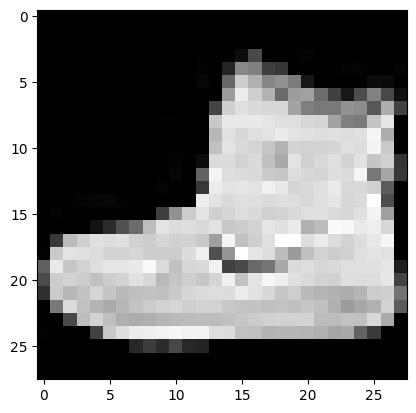

In [17]:
# Display an image from the dataset

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [18]:
# CHECKING THE NAME OF THE CLASSES

train_labels[0]

9

## class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

In [20]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [21]:
# Reshape images to specify that it's a single channel (grayscale)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [23]:
test_images.shape

(10000, 28, 28, 1)

## MAKING THE CONVOLUTIONAL NEURAL NETWORK 

In [24]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
     

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## MODEL TRAINING 

In [25]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.4907 - accuracy: 0.8210 - val_loss: 0.3666 - val_accuracy: 0.8666
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3206 - accuracy: 0.8824 - val_loss: 0.3233 - val_accuracy: 0.8826
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2713 - accuracy: 0.8996 - val_loss: 0.2903 - val_accuracy: 0.8946
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2418 - accuracy: 0.9108 - val_loss: 0.2749 - val_accuracy: 0.8971
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2179 - accuracy: 0.9196 - val_loss: 0.2804 - val_accuracy: 0.9002


## MODEL EVALUATION

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2804 - accuracy: 0.9002 - 770ms/epoch - 2ms/step

Test accuracy: 0.9002000093460083


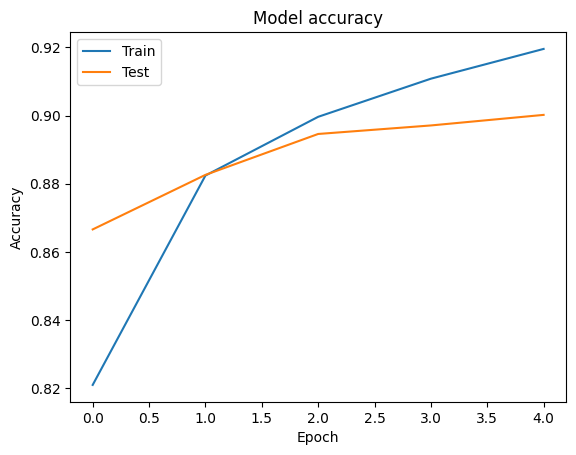

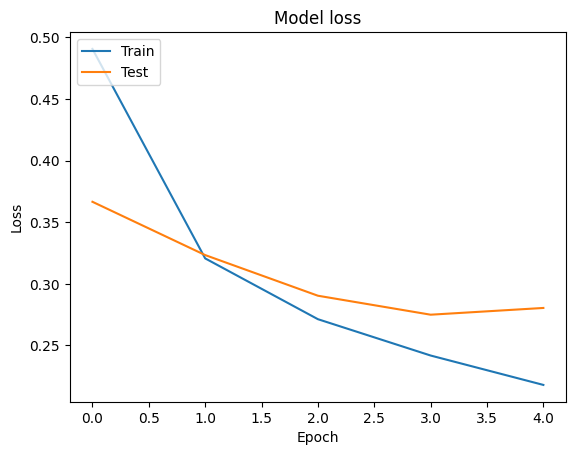

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
## SAVING THE MODEL

In [32]:
model.save('trained_fashion_mnist_model.h5')